In [3]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Load Bristol administrative boundary shapefile
bristol_boundary_path = "E:/RStudio/learning/data/Urban/Bristol mark/Bristol.shp"
bristol_boundary = gpd.read_file(bristol_boundary_path)

#bristol_boundary.crs = "EPSG:27700"  # Assuming OSGB36 / British National Grid

# Load global night light data
night_light_path = "E:/RStudio/learning/data/Urban/night light/2020.tif"
night_light_data = rasterio.open(night_light_path)

# Crop night light data to Bristol boundary
bristol_2020, bristol_transform = rasterio.mask.mask(
    night_light_data,
    bristol_boundary.geometry,
    crop=True,
    nodata=night_light_data.nodata,
)

# Update metadata for the cropped data
night_light_meta = night_light_data.meta
night_light_meta.update({
    "height": bristol_2020.shape[1],
    "width": bristol_2020.shape[2],
    "transform": bristol_transform,
})

# Save the cropped night light data
output_path = "E:/RStudio/learning/data/Urban/night light/bristol_2020.tif"
with rasterio.open(output_path, "w", **night_light_meta) as dst:
    dst.write(bristol_2020)  
print("Cropped night light data saved to:", output_path)

Cropped night light data saved to: E:/RStudio/learning/data/Urban/night light/bristol_2020.tif


In [4]:
pip install --upgrade rasterio

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/160.4 kB 960.0 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/160.4 kB 544.7 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/160.4 kB 435.7 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/160.4 kB 435.7 kB/s eta 0:00:01
     ---------------------- ------------- 102.4/160.4 kB 420.8 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9/160.4 kB 479.3 kB/s eta 0:00:01
     --------------------------- -------- 122.9

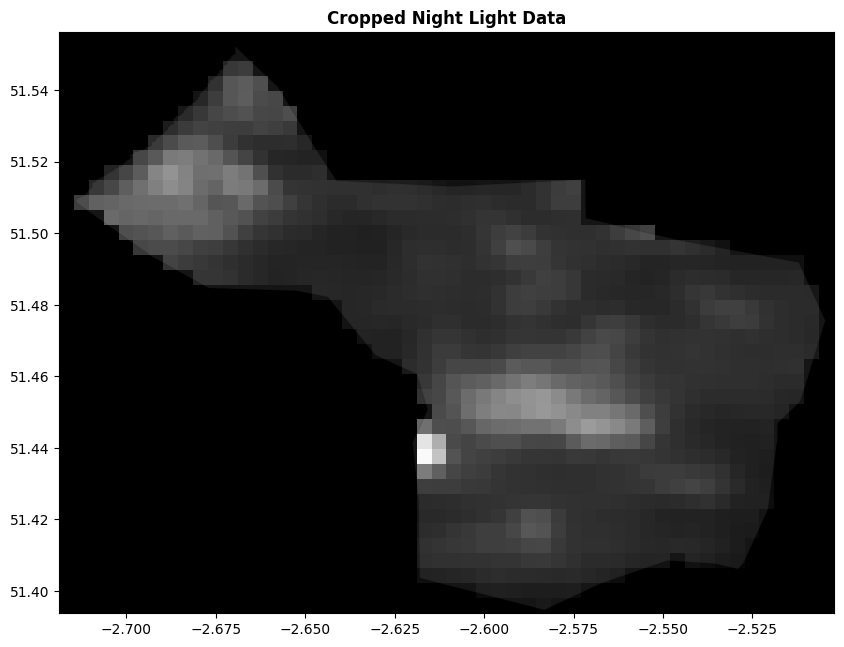

In [14]:
import matplotlib.pyplot as plt
from rasterio.plot import show
# Load the cropped night light data
night_light_data = rasterio.open(output_path)
# Visualize the cropped night light data
fig, ax = plt.subplots(figsize=(10, 10))
bristol_boundary.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.1)
show(night_light_data, ax=ax, cmap='gray', title='Cropped Night Light Data')

plt.show()


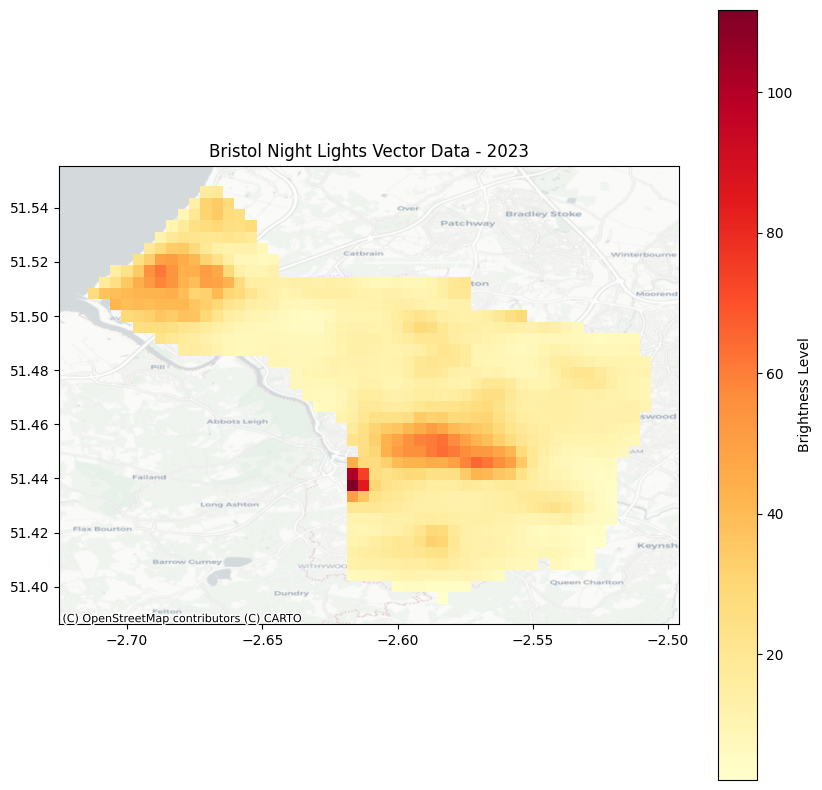

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the shapefile
night_light_vector = gpd.read_file("E:/learning/data/Urban/night light/night_light_vector.shp")

# Filter out rows where 'br_2020' is not equal to 0
night_light_vector_filtered = night_light_vector[night_light_vector['br_2020'] != 0]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
night_light_vector_filtered.plot(column='br_2020', ax=ax, legend=True,
                                 legend_kwds={'label': "Brightness Level"},
                                 cmap='YlOrRd')
ctx.add_basemap(ax, crs=night_light_vector_filtered.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Bristol Night Lights Vector Data - 2023')
plt.show()




In [1]:
import pandas as pd
import os
from glob import glob

# Define the directory where the CSV files are stored
directory_path = 'E:/learning/data/Dissertation/crime'  # Change this to the directory containing your CSV files

# Pattern to match all CSV files in the directory
pattern = os.path.join(directory_path, '*.csv')

# Find all CSV files matching the pattern
csv_files = glob(pattern)

# Function to read each CSV file into a pandas DataFrame and store it in a dictionary
def batch_read_csv(files):
    dataframes = {}
    for file in files:
        try:
            df = pd.read_csv(file, encoding='utf-8')
            # Use the file name without the path as the dictionary key
            filename = os.path.basename(file)
            dataframes[filename] = df
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return dataframes

# Call the function to read all CSV files
dataframes = batch_read_csv(csv_files)

# Example usage: Print the names of the loaded DataFrames
for filename in dataframes.keys():
    print(filename)

# Access a specific DataFrame: dataframes['your_filename.csv']

2023-01-avon-and-somerset-outcomes.csv
2023-02-avon-and-somerset-outcomes.csv
2023-03-avon-and-somerset-outcomes.csv
2023-04-avon-and-somerset-outcomes.csv
2023-05-avon-and-somerset-outcomes.csv
2023-06-avon-and-somerset-outcomes.csv
2023-07-avon-and-somerset-outcomes.csv
2023-08-avon-and-somerset-outcomes.csv
2023-09-avon-and-somerset-outcomes.csv
2023-10-avon-and-somerset-outcomes.csv
2023-11-avon-and-somerset-outcomes.csv
2023-12-avon-and-somerset-outcomes.csv
consolidated-crime-data-2023.csv


In [2]:
# Function to filter DataFrames for rows where "LSOA name" contains "Bristol"
def filter_for_bristol(dataframes):
    bristol_dataframes = {}
    for filename, df in dataframes.items():
        # Filter the DataFrame
        filtered_df = df[df['LSOA name'].str.contains("Bristol", na=False)]
        bristol_dataframes[filename] = filtered_df
    return bristol_dataframes

# Assuming 'dataframes' is your dictionary of DataFrames loaded from CSV files
bristol_dataframes = filter_for_bristol(dataframes)

# Example usage: Print the filtered DataFrame for a specific file
# Replace 'your_filename.csv' with an actual file name from your dataset
print(bristol_dataframes['2023-01-avon-and-somerset-outcomes.csv'].head())

                                             Crime ID   Month  \
49  4a56764cb6d97f82064082e6828f2dfe912bdba4f53604...  23-Jan   
73  2417786b74d2236d17d5b1c454677e645d558952dd8bc8...  23-Jan   
77  6c2b615c6275ce5c324879ae96de90de54b1b9baa8a210...  23-Jan   
78  c82cf73439f429374492f1d5abe9c732dc11bc522c0162...  23-Jan   
79  3a9fe606d80add3d83733702925eb5550546e00148ffba...  23-Jan   

                       Reported by                    Falls within  Longitude  \
49  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.591020   
73  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.542978   
77  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.646667   
78  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.646667   
79  Avon and Somerset Constabulary  Avon and Somerset Constabulary  -2.557782   

     Latitude                      Location  LSOA code     LSOA name  \
49  51.494809                   On or near   E0101

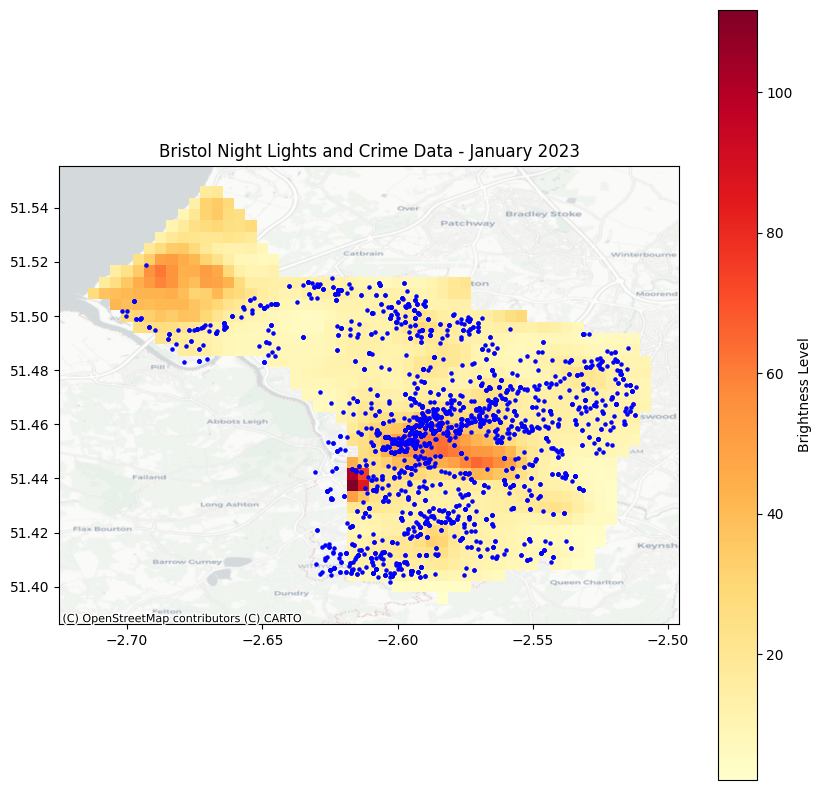

In [6]:
crime_data = bristol_dataframes['2023-01-avon-and-somerset-outcomes.csv']

# Continue with your plotting code
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Convert crime_data DataFrame to a GeoDataFrame
gdf_crime = gpd.GeoDataFrame(
    crime_data,
    geometry=gpd.points_from_xy(crime_data.Longitude, crime_data.Latitude),
    crs="EPSG:4326"  # Ensure this matches your data's coordinate system
).to_crs(night_light_vector_filtered.crs.to_string())  # Convert CRS to match night light data

# Load the shapefile for night light data
night_light_vector = gpd.read_file("E:/learning/data/Urban/night light/night_light_vector.shp")
night_light_vector_filtered = night_light_vector[night_light_vector['br_2020'] != 0]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
night_light_vector_filtered.plot(column='br_2020', ax=ax, legend=True,
                                 legend_kwds={'label': "Brightness Level"},
                                 cmap='YlOrRd')
gdf_crime.plot(ax=ax, color='blue', markersize=5)  # Plot crime data
ctx.add_basemap(ax, crs=night_light_vector_filtered.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Bristol Night Lights and Crime Data - January 2023')
plt.show()



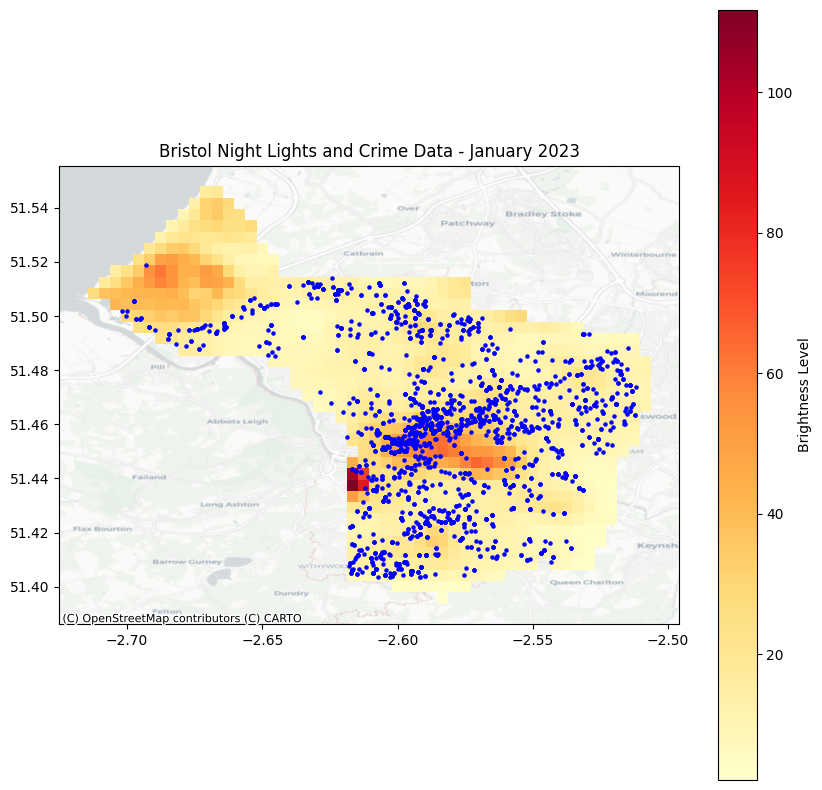

In [9]:
# Ensure both GeoDataFrames use the same CRS
gdf_crime = gdf_crime.to_crs(night_light_vector_filtered.crs)

# Use spatial join to filter crime points within the night light data extent
crime_within_night_light = gpd.sjoin(gdf_crime, night_light_vector_filtered, how='inner', predicate='within')
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
night_light_vector_filtered.plot(column='br_2020', ax=ax, legend=True,
                                 legend_kwds={'label': "Brightness Level"},
                                 cmap='YlOrRd')
crime_within_night_light.plot(ax=ax, color='blue', markersize=5)  # Plot crime data
ctx.add_basemap(ax, crs=night_light_vector_filtered.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Bristol Night Lights and Crime Data - January 2023')
plt.show()